## 🔶 Student-Score-Predictor-model

In [13]:
import pandas as pd
import numpy as np

def create_student_score_df(data=None, num_samples=500, include_scores=True):
    """
    Create a DataFrame for a Student Score Predictor.

    Parameters:
        data (list of dicts, optional): Custom input data for the DataFrame.
        num_samples (int): Number of sample rows to generate if data is not provided.
        include_scores (bool): Whether to include 'FinalExamScore' in the DataFrame.

    Returns:
        pd.DataFrame: DataFrame with student prediction features (and optional target).
    """
    if data:
        df = pd.DataFrame(data)
    else:
        import numpy as np
        np.random.seed(42)  # For reproducibility

        df = pd.DataFrame({
            'StudentID': [f"S{1000+i}" for i in range(num_samples)],
            'HoursStudied': np.round(np.random.uniform(1, 10, size=num_samples), 1),
            'AttendanceRate': np.round(np.random.uniform(50, 100, size=num_samples), 1),
            'PreviousScores': np.round(np.random.uniform(40, 100, size=num_samples), 1),
            'ParticipationLevel': np.random.choice(['Low', 'Medium', 'High'], size=num_samples)
        })

        if include_scores:
            # A simple formula for synthetic score
            df['FinalExamScore'] = np.round(
                0.3 * df['HoursStudied'] +
                0.2 * df['AttendanceRate'] / 10 +
                0.4 * df['PreviousScores'] / 10 +
                df['ParticipationLevel'].map({'Low': 0, 'Medium': 1, 'High': 2}) * 2,
                1
            )
    
    return df

In [14]:
df = create_student_score_df()
df.head(10)

,StudentID,HoursStudied,AttendanceRate,PreviousScores,ParticipationLevel,FinalExamScore
0,S1000,4.4,84.9,51.1,Medium,7.1
1,S1001,9.6,76.8,72.5,Medium,9.3
2,S1002,7.6,65.5,92.4,Low,7.3
3,S1003,6.4,90.7,83.9,Low,7.1
4,S1004,2.4,84.2,88.4,Medium,7.9
5,S1005,2.4,58.1,79.5,Low,5.1
6,S1006,1.5,95.5,81.5,Low,5.6
7,S1007,8.8,91.1,91.0,Medium,10.1
8,S1008,6.4,97.5,55.0,Low,6.1
9,S1009,7.4,86.3,69.4,High,10.7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentID           500 non-null    object 
 1   HoursStudied        500 non-null    float64
 2   AttendanceRate      500 non-null    float64
 3   PreviousScores      500 non-null    float64
 4   ParticipationLevel  500 non-null    object 
 5   FinalExamScore      500 non-null    float64
dtypes: float64(4), object(2)
memory usage: 23.6+ KB


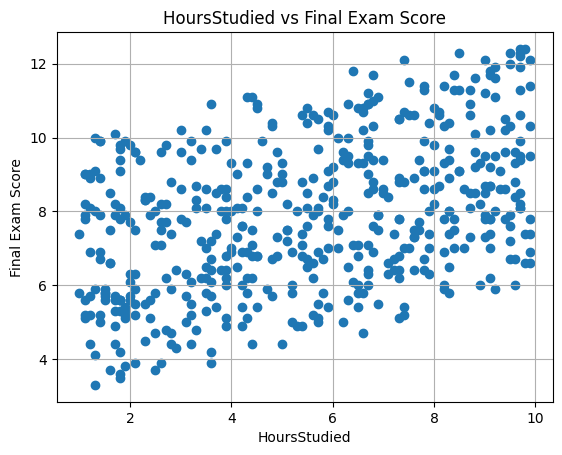

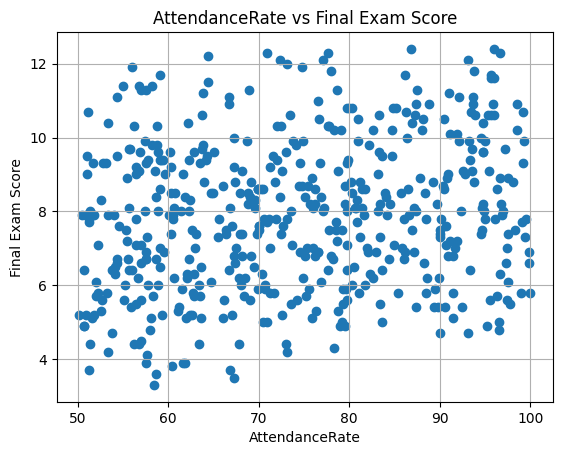

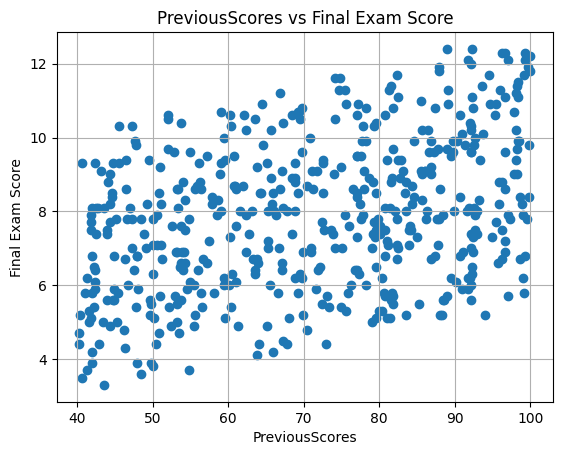

In [16]:
import matplotlib.pyplot as plt

numerical_columns = ['HoursStudied', 'AttendanceRate', 'PreviousScores']
categorical_columns = ['ParticipationLevel']

for col in numerical_columns:
    plt.scatter(df[f'{col}'], df['FinalExamScore'])
    plt.xlabel(f'{col}')
    plt.ylabel('Final Exam Score')
    plt.title(f'{col} vs Final Exam Score')
    plt.grid(True)
    plt.show()

## Understanding Relationships Between Features and Final Exam Score

We created scatter plots to understand how different features (inputs) affect the final exam score. Here's what we found:

---

### 1. Hours Studied vs Final Exam Score

- **What we see**: As the number of hours studied increases, the final exam score also tends to go up.
- **Type of relationship**: **Linear**
- **Why**: The data points follow a roughly straight line going upward. Even though there’s some scatter, there’s a clear trend.

📈 **Conclusion**: Students who study more tend to get higher scores.

---

### 2. Attendance Rate vs Final Exam Score

- **What we see**: The data points are spread out randomly, without a clear upward or downward pattern.
- **Type of relationship**: **No clear relationship or non-linear**
- **Why**: We don’t see any trend or line the data is following.

📉 **Conclusion**: Attendance rate alone doesn't seem to predict exam scores well.

---

### 3. Previous Scores vs Final Exam Score

- **What we see**: Students with higher previous scores tend to also score higher in the final exam.
- **Type of relationship**: **Linear**
- **Why**: The points form a strong upward pattern that looks like a straight line.

📈 **Conclusion**: Previous performance is a strong predictor of final exam scores.

---

### Summary Table

| Feature               | Relationship Type     | Trend Description                      |
|-----------------------|------------------------|----------------------------------------|
| Hours Studied         | Linear (weak/moderate) | Higher study time = higher score       |
| Attendance Rate       | None or Non-linear     | No clear pattern                       |
| Previous Scores       | Linear (strong)        | Higher previous scores = higher final  |

---

### How We Can Tell the Relationship Type

To understand the type of relationship:
- We look at the **pattern** of dots in the scatter plot.
- If they follow a straight line (up or down), it's **linear**.
- If they are spread out without a pattern, it's **non-linear** or **no relationship**.

In the future, we can also calculate **correlation coefficients** or use **linear regression** to confirm our observations with numbers.

In [17]:
correlation_hours = df['HoursStudied'].corr(df['FinalExamScore'])
correlation_attendance = df['AttendanceRate'].corr(df['FinalExamScore'])
correlation_previous = df['PreviousScores'].corr(df['FinalExamScore'])

print(f"Correlation (HoursStudied): {correlation_hours:.2f}")
print(f"Correlation (AttendanceRate): {correlation_attendance:.2f}")
print(f"Correlation (PreviousScores): {correlation_previous:.2f}")

Correlation (HoursStudied): 0.43
Correlation (AttendanceRate): 0.19
Correlation (PreviousScores): 0.38


### Do These Relationships Look Linear?

We calculated the correlation values to help us check if the relationships between our variables and final exam score are linear.

| Feature             | Correlation | Relationship Type       |
|---------------------|-------------|--------------------------|
| Hours Studied       | 0.43        | Moderate linear          |
| Attendance Rate     | 0.19        | Weak or no linear        |
| Previous Scores     | 0.38        | Moderate linear          |

- A **correlation value near 1** means a strong linear relationship.
- A value **close to 0** means no clear linear trend.
- Based on this:
  - **HoursStudied** and **PreviousScores** show **linear relationships** with FinalExamScore.
  - **AttendanceRate** shows a **very weak or no linear** relationship.

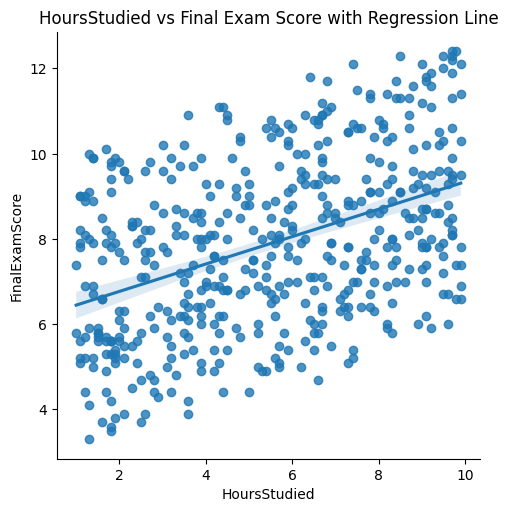

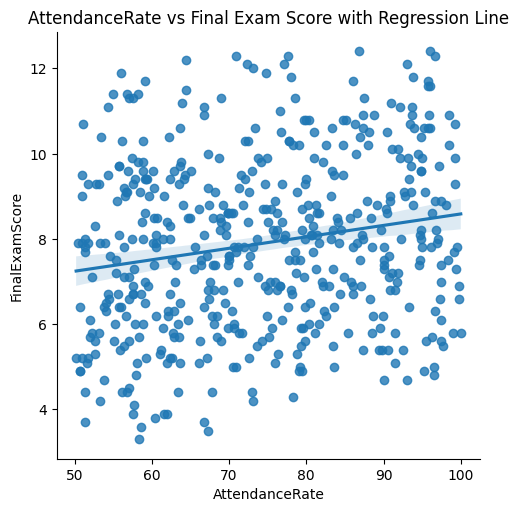

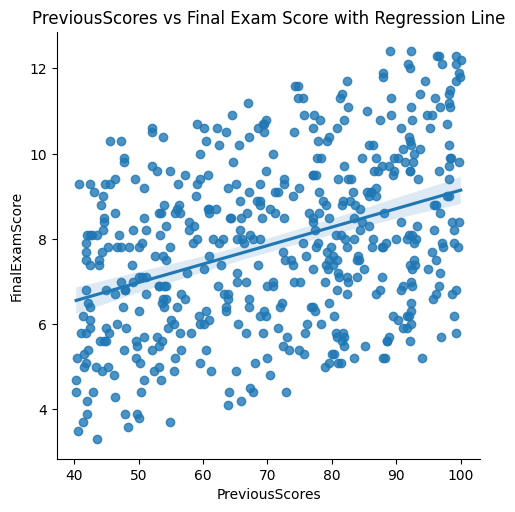

In [18]:
import seaborn as sns

for col in numerical_columns:
    # Plot with regression line
    sns.lmplot(x=f'{col}', y='FinalExamScore', data=df)
    plt.title(f'{col} vs Final Exam Score with Regression Line')
    plt.show()

In [19]:
X = df.drop(columns=['StudentID', 'FinalExamScore'])
y = df['FinalExamScore']

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer([
    ('std', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(drop='first'), categorical_columns)
])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

k_values = [0.0001, 0.0005, 0.001, 0.005]

best_score = -np.inf
best_model = None

for k in k_values:
    for _ in tqdm(range(500)):
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        model = Pipeline([
            ('preprocess', preprocessor),
            ('regressor', LinearRegression())
        ])
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        score = r2 - k * rmse
        
        if score > best_score:
            best_k = k
            best_score = score
            best_r2 = r2
            best_rmse = rmse
            best_model = model

100%|██████████| 500/500 [00:05<00:00, 90.68it/s] 


In [22]:
print(f"Best-score : {float(best_score)}")
print(f"Best-k : {best_k}")
print(f"Best R² Score: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.2f}")

Best-score : 0.9998307908147763
Best-k : 0.0001
Best R² Score: 0.9998
Best RMSE: 0.03


In [23]:
new_data = pd.DataFrame({
    'HoursStudied': [5.0],
    'AttendanceRate': [85.0],
    'PreviousScores': [75.0],
    'ParticipationLevel': ['Medium']
})

predicted_score = best_model.predict(new_data)
print("Predicted Final Exam Score:", predicted_score[0])

Predicted Final Exam Score: 8.165014809515696


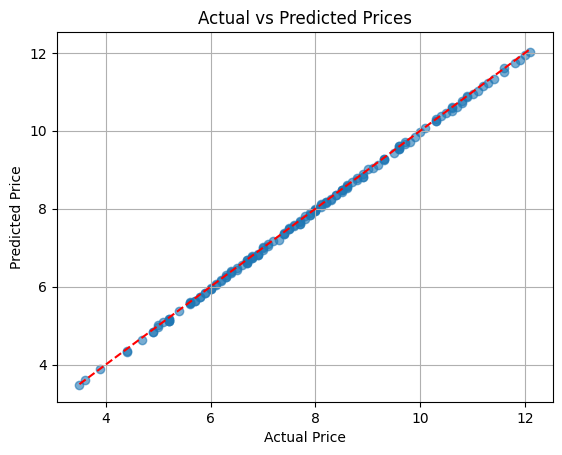

In [24]:
y_pred =  best_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()